In [17]:
import sportsdataverse.mbb as mbb
import sportsdataverse.wbb as wbb
import pandas as pd
import numpy as np
import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None
import pickle
import pyomo.environ as pyo

In [2]:
def timer(function):
    def wrapper(*args, **kwargs):
        start = time.perf_counter()
        results = function(*args, **kwargs)
        end = time.perf_counter()
        print(f'{function.__name__}: {round(end-start, 2)}')
        return results
    return wrapper

@timer
def load_player_data(start_year: int, end_year: int) -> pd.DataFrame:
    return mbb.load_mbb_player_boxscore(seasons = range(start_year, end_year))

@timer
def load_player_data_wbb(start_year: int, end_year: int) -> pd.DataFrame:
    return wbb.load_wbb_player_boxscore(seasons = range(start_year, end_year))

player_data = load_player_data(start_year=2017, end_year=2023)
player_data

100%|██████████| 6/6 [00:16<00:00,  2.80s/it]


load_player_data: 16.81


,game_id,season,season_type,game_date,game_date_time,athlete_id,athlete_display_name,team_id,team_name,team_location,...,team_score,opponent_team_id,opponent_team_name,opponent_team_location,opponent_team_display_name,opponent_team_abbreviation,opponent_team_logo,opponent_team_color,opponent_team_alternate_color,opponent_team_score
0,400949246,2017,3,2017-04-03,2017-04-03 21:20:00-04:00,66260.0,Johnathan Williams,2250,Bulldogs,Gonzaga,...,65,153,Tar Heels,North Carolina,North Carolina Tar Heels,UNC,https://a.espncdn.com/i/teamlogos/ncaa/500/153...,7bafd4,13294b,71
1,400949246,2017,3,2017-04-03,2017-04-03 21:20:00-04:00,62585.0,Przemek Karnowski,2250,Bulldogs,Gonzaga,...,65,153,Tar Heels,North Carolina,North Carolina Tar Heels,UNC,https://a.espncdn.com/i/teamlogos/ncaa/500/153...,7bafd4,13294b,71
2,400949246,2017,3,2017-04-03,2017-04-03 21:20:00-04:00,3155941.0,Josh Perkins,2250,Bulldogs,Gonzaga,...,65,153,Tar Heels,North Carolina,North Carolina Tar Heels,UNC,https://a.espncdn.com/i/teamlogos/ncaa/500/153...,7bafd4,13294b,71
3,400949246,2017,3,2017-04-03,2017-04-03 21:20:00-04:00,67814.0,Nigel Williams-Goss,2250,Bulldogs,Gonzaga,...,65,153,Tar Heels,North Carolina,North Carolina Tar Heels,UNC,https://a.espncdn.com/i/teamlogos/ncaa/500/153...,7bafd4,13294b,71
4,400949246,2017,3,2017-04-03,2017-04-03 21:20:00-04:00,66328.0,Jordan Mathews,2250,Bulldogs,Gonzaga,...,65,153,Tar Heels,North Carolina,North Carolina Tar Heels,UNC,https://a.espncdn.com/i/teamlogos/ncaa/500/153...,7bafd4,13294b,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062585,401365200,2022,2,2021-11-09,2021-11-09 15:00:00-05:00,4397118.0,Ant Nelson,2363,Jaspers,Manhattan,...,99,2879,Valiants,Manhattanville,Manhattanville Valiants,MAN,None,None,None,42
1062586,401365200,2022,2,2021-11-09,2021-11-09 15:00:00-05:00,4703173.0,Amir Britt,2363,Jaspers,Manhattan,...,99,2879,Valiants,Manhattanville,Manhattanville Valiants,MAN,None,None,None,42
1062587,401365200,2022,2,2021-11-09,2021-11-09 15:00:00-05:00,4398105.0,Daniel Schreier,2363,Jaspers,Manhattan,...,99,2879,Valiants,Manhattanville,Manhattanville Valiants,MAN,None,None,None,42
1062588,401365200,2022,2,2021-11-09,2021-11-09 15:00:00-05:00,4901655.0,Daniel Hackett,2363,Jaspers,Manhattan,...,99,2879,Valiants,Manhattanville,Manhattanville Valiants,MAN,None,None,None,42


In [3]:
player_data.columns

Index(['game_id', 'season', 'season_type', 'game_date', 'game_date_time',
       'athlete_id', 'athlete_display_name', 'team_id', 'team_name',
       'team_location', 'team_short_display_name', 'minutes',
       'field_goals_made', 'field_goals_attempted',
       'three_point_field_goals_made', 'three_point_field_goals_attempted',
       'free_throws_made', 'free_throws_attempted', 'offensive_rebounds',
       'defensive_rebounds', 'rebounds', 'assists', 'steals', 'blocks',
       'turnovers', 'fouls', 'points', 'starter', 'ejected', 'did_not_play',
       'active', 'athlete_jersey', 'athlete_short_name',
       'athlete_headshot_href', 'athlete_position_name',
       'athlete_position_abbreviation', 'team_display_name', 'team_uid',
       'team_slug', 'team_logo', 'team_abbreviation', 'team_color',
       'team_alternate_color', 'home_away', 'team_winner', 'team_score',
       'opponent_team_id', 'opponent_team_name', 'opponent_team_location',
       'opponent_team_display_name', 'opp

In [4]:
needed_cols = ['athlete_id', 'athlete_display_name', 'game_id', 'season', 'team_id', 'team_location', 
               'team_score', 'team_winner', 'assists',
                'blocks', 'defensive_rebounds', 'field_goals_made', 'field_goals_attempted', 'fouls', 
                'free_throws_made', 'free_throws_attempted', 'offensive_rebounds', 'steals', 'minutes',
                'three_point_field_goals_made', 'three_point_field_goals_attempted', 'turnovers', 'opponent_team_score', 'points']
def get_ppa_two(row):
    total_points = 2 * row['two_point_made']
    total_attempts = row['two_point_attempted']
    if total_attempts > 0:
        return total_points / total_attempts
    else:
        return 0

def get_ppa_three(row):
    total_points = 3 * row['three_point_field_goals_made']
    total_attempts = row['three_point_field_goals_attempted']
    if total_attempts > 0:
        return total_points / total_attempts
    else:
        return 0

def get_total_ppa(row):
    total_points = 2 * row['two_point_made'] + 3 * row['three_point_field_goals_made']
    total_attempts = row['field_goals_attempted']
    if total_attempts > 0:
        return total_points / total_attempts
    else:
        return 0

def team_scoring_poss(row):
    team_attempts = row['field_goals_made']
    if row['free_throws_attempted'] > 0:
        inner_part = (1 - (1 - (row['free_throws_made'] / row['free_throws_attempted']) ** 2))
    else:
        inner_part = 0
    return team_attempts + inner_part *  row['free_throws_attempted'] * 0.4

def team_play_percent(row):
    numerator = row['scoring_possesions']
    denom = row['field_goals_attempted'] + row['free_throws_attempted'] * 0.4 + row['total_turnovers']
    if denom > 0:
        return numerator / denom
    else:
        return 0

def possesions(row):
    fga = row['field_goals_attempted']
    other_team_def_rebounds = (row['field_goals_attempted'] - row['field_goals_made']) - row['offensive_rebounds']
    if row['offensive_rebounds'] + other_team_def_rebounds == 0:
        reb_part = 0
    else:
        reb_part = row['offensive_rebounds']/(row['offensive_rebounds'] + other_team_def_rebounds)
    fg_part = row['field_goals_attempted'] - row['field_goals_made']
    return fga - reb_part * fg_part * 1.07 + row['turnovers'] + row['free_throws_attempted'] * 0.4

def offensive_efficiency(row):
    num = row['field_goals_made'] + row['assists']
    denom = row['field_goals_attempted'] - row['offensive_rebounds'] + row['assists'] + row['turnovers']
    if denom != 0:
        return num / denom
    else:
        return 0

def efficient_offense(row):
    inner = .76 * row['assists'] + row['team_score']
    return inner * row['offensive_efficiency']

def effective_fgp(row):
    num = row['field_goals_made'] + (.5 * row['three_point_field_goals_made'])
    denom = row['field_goals_attempted']
    if denom > 0:
        return num / denom
    else:
        return 0

def def_efficiency(row):
    if row['possesions'] > 0:
        return (row['opponent_team_score']/row['possesions'])
    else:
        return 0

In [5]:
len(needed_cols)

24

In [6]:
player_data_trim = player_data[needed_cols]
player_data_trim.loc[:, 'win'] = player_data_trim.loc[:, 'team_winner'].apply(lambda x: 1 if x is True else 0)
player_data_trim.loc[:, 'games'] = 1
player_data_trim['two_point_attempted'] = player_data_trim['field_goals_attempted'] - player_data_trim['three_point_field_goals_attempted']
player_data_trim['two_point_made'] = player_data_trim['field_goals_made'] - player_data_trim['three_point_field_goals_made']
player_data_trim['offensive_efficiency'] = player_data_trim.apply(offensive_efficiency, axis='columns')
player_data_trim['eff_points'] = player_data_trim.apply(efficient_offense, axis='columns')
player_data_trim['EFG%'] = player_data_trim.apply(effective_fgp, axis='columns')
player_data_trim['2PPA'] = player_data_trim.apply(get_ppa_two, axis='columns')
player_data_trim['3PPA'] = player_data_trim.apply(get_ppa_three, axis='columns')
player_data_trim['PPA'] = player_data_trim.apply(get_total_ppa, axis='columns')
player_data_trim['possesions'] = player_data_trim.apply(possesions, axis='columns')
player_data_trim['def_efficiency'] = player_data_trim.apply(def_efficiency, axis='columns')

In [7]:
summary_data = (player_data_trim.copy()
                              .groupby(by=['team_location', 'season', 'team_id' ,'athlete_id',	'athlete_display_name'], 
                                       as_index=False)
                              .agg({'win': np.sum,
                                    'games': np.sum,
                                    'team_score': np.mean,
                                    'assists': np.mean,
                                    'blocks': np.mean,
                                    'defensive_rebounds': np.mean,
                                    'field_goals_made': np.mean,
                                    'field_goals_attempted': np.mean,
                                    'free_throws_made': np.mean,
                                    'free_throws_attempted': np.mean,
                                    'offensive_rebounds': np.mean,
                                    'steals': np.mean,
                                    'turnovers': np.mean,
                                    'three_point_field_goals_made': np.mean,
                                    'three_point_field_goals_attempted': np.mean,
                                    'two_point_attempted': np.mean,
                                    'two_point_made': np.mean,
                                    'offensive_efficiency': np.mean,
                                    'eff_points': np.mean,
                                    'EFG%': np.mean,
                                    '2PPA': np.mean,
                                    '3PPA': np.mean,
                                    'PPA': np.mean,
                                    'minutes': np.mean,
                                    'def_efficiency': np.mean,
                                    'possesions': np.mean,
                                    'points': np.mean
                                    })
)

summary_data = summary_data[summary_data['games'] > 10]
summary_data

,team_location,season,team_id,athlete_id,athlete_display_name,win,games,team_score,assists,blocks,...,offensive_efficiency,eff_points,EFG%,2PPA,3PPA,PPA,minutes,def_efficiency,possesions,points
0,Abilene Christian,2017,2000,3152347.0,Isaiah Tripp,13,29,69.275862,1.586207,0.034483,...,0.525759,37.512289,0.549562,0.959770,1.046552,1.099124,22.827586,16.903087,5.907241,6.034483
1,Abilene Christian,2017,2000,3152349.0,Drake Green,13,29,69.275862,1.111111,0.222222,...,0.461170,33.463218,0.505692,0.298851,1.139901,1.011385,24.000000,14.744210,5.604444,5.666667
2,Abilene Christian,2017,2000,3922055.0,Jaylen Franklin,13,29,69.275862,4.423077,0.307692,...,0.553017,41.103096,0.434989,0.921412,0.282759,0.869979,34.461538,5.266493,13.244615,10.846154
3,Abilene Christian,2017,2000,3922056.0,Jaren Lewis,13,29,69.275862,2.103448,0.413793,...,0.543973,39.394525,0.537475,1.086874,0.672414,1.074950,32.379310,6.010418,12.836897,13.689655
4,Abilene Christian,2017,2000,3922057.0,B.J. Maxwell,13,29,69.275862,0.588235,0.176471,...,0.427171,30.134230,0.226485,0.359606,0.439655,0.452969,10.529412,24.124117,2.617059,3.411765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67795,Youngstown State,2022,2754,4898196.0,Collen Gurley,19,34,72.647059,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN
67796,Youngstown State,2022,2754,4898197.0,Luke Chicone,19,34,72.647059,2.192308,0.076923,...,0.509310,39.153512,0.232750,0.458824,0.132353,0.465500,12.538462,21.565992,3.401923,2.653846
67797,Youngstown State,2022,2754,4898198.0,Jacori Owens,19,34,72.647059,0.272727,0.272727,...,0.290043,23.082424,0.086134,0.172269,0.000000,0.172269,7.272727,8.899116,1.646364,2.181818
67798,Youngstown State,2022,2754,4898199.0,Michael Lucarotti,19,34,72.647059,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN


In [8]:
cluster_config = pd.read_csv('C:/Users/Jake/Documents/GitHub/Capstone/data/team_clusters.csv')
summary_data_cluster = pd.merge(summary_data,
                                cluster_config,
                                on=['team_location', 'season']
)
summary_data_cluster

,team_location,season,team_id,athlete_id,athlete_display_name,win,games,team_score,assists,blocks,...,eff_points,EFG%,2PPA,3PPA,PPA,minutes,def_efficiency,possesions,points,Cluster
0,Abilene Christian,2017,2000,3152347.0,Isaiah Tripp,13,29,69.275862,1.586207,0.034483,...,37.512289,0.549562,0.959770,1.046552,1.099124,22.827586,16.903087,5.907241,6.034483,0
1,Abilene Christian,2017,2000,3152349.0,Drake Green,13,29,69.275862,1.111111,0.222222,...,33.463218,0.505692,0.298851,1.139901,1.011385,24.000000,14.744210,5.604444,5.666667,0
2,Abilene Christian,2017,2000,3922055.0,Jaylen Franklin,13,29,69.275862,4.423077,0.307692,...,41.103096,0.434989,0.921412,0.282759,0.869979,34.461538,5.266493,13.244615,10.846154,0
3,Abilene Christian,2017,2000,3922056.0,Jaren Lewis,13,29,69.275862,2.103448,0.413793,...,39.394525,0.537475,1.086874,0.672414,1.074950,32.379310,6.010418,12.836897,13.689655,0
4,Abilene Christian,2017,2000,3922057.0,B.J. Maxwell,13,29,69.275862,0.588235,0.176471,...,30.134230,0.226485,0.359606,0.439655,0.452969,10.529412,24.124117,2.617059,3.411765,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32803,Youngstown State,2022,2754,4898196.0,Collen Gurley,19,34,72.647059,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0
32804,Youngstown State,2022,2754,4898197.0,Luke Chicone,19,34,72.647059,2.192308,0.076923,...,39.153512,0.232750,0.458824,0.132353,0.465500,12.538462,21.565992,3.401923,2.653846,0
32805,Youngstown State,2022,2754,4898198.0,Jacori Owens,19,34,72.647059,0.272727,0.272727,...,23.082424,0.086134,0.172269,0.000000,0.172269,7.272727,8.899116,1.646364,2.181818,0
32806,Youngstown State,2022,2754,4898199.0,Michael Lucarotti,19,34,72.647059,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0


In [148]:
@timer
def read_pickle(file):
    with open(file, 'rb') as f:
        return pickle.load(f)
my_frames = []
for cluster in summary_data_cluster.Cluster.unique():
    print(cluster)
    scaler_file = f'C:/Users/Jake/Documents/GitHub/Capstone/data/{cluster}_scaler.pickle'
    model_file = f'C:/Users/Jake/Documents/GitHub/Capstone/data/{cluster}_model.pickle'
    zero_scaler = read_pickle(scaler_file)
    model_file = read_pickle(model_file)
    this_cluster = summary_data_cluster[summary_data_cluster['Cluster'] == cluster].fillna(0)
    features = ['blocks', 'defensive_rebounds',
        'free_throws_made', 'offensive_rebounds',
        'steals', 'turnovers',
        'three_point_field_goals_made', 'three_point_field_goals_attempted',
        'two_point_attempted', 'offensive_efficiency',
        'two_point_made', 'EFG%', '2PPA',
        '3PPA', 'PPA', 'def_efficiency', 'points']
    per_minute_columns = ['assists', 'blocks', 'defensive_rebounds',
        'field_goals_made', 'field_goals_attempted', 'free_throws_made',
        'free_throws_attempted', 'offensive_rebounds', 'steals',
        'turnovers', 'three_point_field_goals_made',
        'three_point_field_goals_attempted', 'two_point_attempted',
        'two_point_made', 'points']
    for feat in per_minute_columns:
        this_cluster[feat] = ((this_cluster[feat] /this_cluster['minutes']))
    model_feats = this_cluster[features].rename(columns={'turnovers': 'total_turnovers', 
                                                                    'points': 'team_score'}).replace([np.inf, -np.inf, np.nan], 0)
    model_feats_scaled = zero_scaler.transform(model_feats)
    this_cluster['WINS_ADDED'] = model_file.predict(model_feats_scaled)
    my_frames.append(this_cluster)


0
read_pickle: 0.0
read_pickle: 0.02
2
read_pickle: 0.0
read_pickle: 0.02
1
read_pickle: 0.0
read_pickle: 0.03


In [159]:
all_data = pd.concat(my_frames)
all_data

,team_location,season,team_id,athlete_id,athlete_display_name,win,games,team_score,assists,blocks,...,EFG%,2PPA,3PPA,PPA,minutes,def_efficiency,possesions,points,Cluster,WINS_ADDED
0,Abilene Christian,2017,2000,3152347.0,Isaiah Tripp,13,29,69.275862,0.069486,0.001511,...,0.549562,0.959770,1.046552,1.099124,22.827586,16.903087,5.907241,0.264350,0,11.077153
1,Abilene Christian,2017,2000,3152349.0,Drake Green,13,29,69.275862,0.046296,0.009259,...,0.505692,0.298851,1.139901,1.011385,24.000000,14.744210,5.604444,0.236111,0,9.464860
2,Abilene Christian,2017,2000,3922055.0,Jaylen Franklin,13,29,69.275862,0.128348,0.008929,...,0.434989,0.921412,0.282759,0.869979,34.461538,5.266493,13.244615,0.314732,0,14.008094
3,Abilene Christian,2017,2000,3922056.0,Jaren Lewis,13,29,69.275862,0.064963,0.012780,...,0.537475,1.086874,0.672414,1.074950,32.379310,6.010418,12.836897,0.422790,0,11.765169
4,Abilene Christian,2017,2000,3922057.0,B.J. Maxwell,13,29,69.275862,0.055866,0.016760,...,0.226485,0.359606,0.439655,0.452969,10.529412,24.124117,2.617059,0.324022,0,9.608201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32498,Wyoming,2020,2751,4593128.0,Danny Gosar,9,32,63.406250,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1,18.130111
32499,Wyoming,2020,2751,4593129.0,Kwane Marble,9,32,63.406250,0.053232,0.011407,...,0.388937,0.704552,0.617634,0.777875,19.481481,16.631787,7.300741,0.422053,1,10.603259
32500,Wyoming,2020,2751,4593130.0,Greg Milton III,9,33,62.727273,0.055901,0.002070,...,0.379582,0.592785,0.532251,0.759163,14.636364,31.883913,4.075758,0.260870,1,10.603259
32501,Wyoming,2020,2751,4593131.0,Tyler Morman,9,32,63.406250,0.035714,0.035714,...,0.031250,0.062500,0.000000,0.062500,14.000000,1.031250,1.000000,0.071429,1,13.861457


In [196]:
all_data = pd.concat(my_frames)
def fill_not_play(row):
    if row['minutes'] == 0:
        return 0
    else:
        return row['WINS_ADDED']

def min_bump(row):
    return row['WINS_ADDED'] + (row['minutes']/3)

all_data['WINS_ADDED'] = all_data.apply(fill_not_play, axis='columns')
all_data['WINS_ADDED'] = all_data.apply(min_bump, axis='columns')

<Axes: >

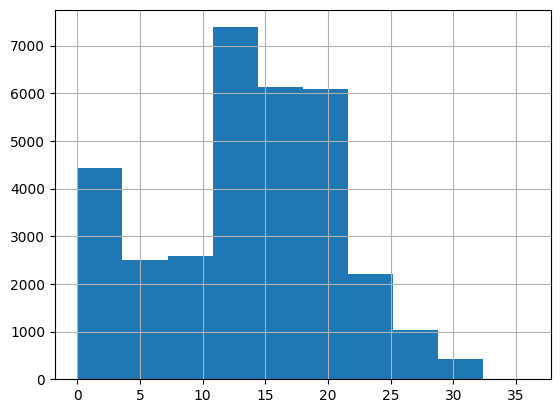

In [197]:
all_data['WINS_ADDED'].hist()

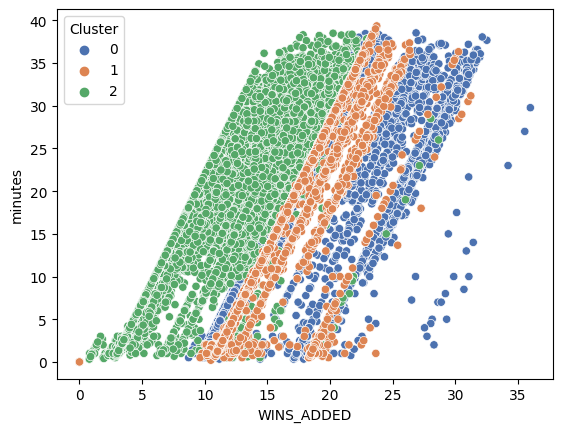

In [198]:
import seaborn as sns

sns.scatterplot(data=all_data, x='WINS_ADDED', y='minutes', hue='Cluster', palette='deep');

In [187]:
test_team = all_data[(all_data['team_location'] == 'Creighton')
                                     & (all_data['season'] == 2021)]
def model_minutes(test_team):
    def fill_not_play(row):
        if row['minutes'] == 0:
            return 0
        else:
            return row['WINS_ADDED']

    def min_bump(row):
        return row['WINS_ADDED'] + (row['minutes']/3)
    
    test_team['WINS_ADDED'] = test_team.apply(fill_not_play, axis='columns')
    test_team['WINS_ADDED'] = test_team.apply(min_bump, axis='columns')
    players = test_team['athlete_display_name'].tolist()
    play_val = test_team['WINS_ADDED'].tolist()
    max_constraint_val = (test_team.sort_values(by='minutes', ascending=False)
                                .reset_index()
                                .loc[0 ,'minutes']
    )
    mins = test_team['minutes'].tolist()
    player_count = len(test_team[test_team['minutes'] >= 5])
    value = dict(zip(players, play_val))
    mins_dict = dict(zip(players, mins))

    model = pyo.ConcreteModel()
    model.minutes = pyo.Var(players, domain=pyo.NonNegativeReals)
    model.playing_flg = pyo.Var(players, domain=pyo.Boolean)
    model.star_players = pyo.Var(players, domain=pyo.Boolean)
    model.over_thirty = pyo.Var(players, domain=pyo.Boolean)
    model.above_20 = pyo.Var(players, domain=pyo.Boolean)


    model.totals = pyo.Objective(expr=sum((value[player] * model.minutes[player]) for player in players), 
                                sense=pyo.maximize
    )

    model.max_mins = pyo.ConstraintList()
    for player in players:
        model.max_mins.add(model.minutes[player] <= max_constraint_val)

    model.select_players = pyo.ConstraintList()
    for player in players:  # choose player
        model.select_players.add(model.playing_flg[player] <= 1 * model.minutes[player])
    

    model.at_max_val = pyo.ConstraintList()
    for player in players:
        model.at_max_val.add(model.minutes[player] <= max_constraint_val-1 + (500 * model.star_players[player]))

    model.above_thirty_val = pyo.ConstraintList()
    for player in players:
        model.above_thirty_val.add(model.minutes[player] <= 29 + (500 * model.over_thirty[player]))

    model.above_twenty_val = pyo.ConstraintList()
    for player in players:
        model.above_twenty_val.add(model.minutes[player] <= 19 + (500 * model.above_20[player]))

    model.constraints = pyo.ConstraintList()

    model.constraints.add(sum(model.star_players[player] for player in players) <= 2)
    model.constraints.add(sum(model.over_thirty[player] for player in players) <= 3)
    model.constraints.add(sum(model.above_20[player] for player in players) <= 5)

    model.constraints.add(sum(model.minutes[player] for player in players) == 200)

    model.constraints.add(sum(model.playing_flg[player] for player in players) >= player_count)


    solver = pyo.SolverFactory('glpk')
    solver.solve(model)
    dvars = (pd.DataFrame([model.minutes[player]() for player in players],
                        index=players,
                        columns=['Model_Minutes'])
            .reset_index()
            .rename(columns={'index': 'athlete_display_name'})
    )
    test_join = (pd.merge(test_team,
                        dvars,
                        on=['athlete_display_name'])
                .sort_values(by='WINS_ADDED', ascending=False)
    )

    return test_join

test_join = model_minutes(test_team)

test_join

,team_location,season,team_id,athlete_id,athlete_display_name,win,games,team_score,assists,blocks,...,2PPA,3PPA,PPA,minutes,def_efficiency,possesions,points,Cluster,WINS_ADDED,Model_Minutes
0,Creighton,2021,156,4066720.0,Damien Jefferson,22,31,75.967742,0.078288,0.008351,...,1.170855,0.917742,1.158393,30.903226,7.367775,10.356129,0.385177,0,29.867071,33.586207
8,Creighton,2021,156,4397037.0,Christian Bishop,22,31,75.967742,0.051105,0.044199,...,1.363895,0.096774,1.352905,23.354839,9.104903,8.121935,0.472376,0,27.350942,33.586207
7,Creighton,2021,156,4397036.0,Marcus Zegarowski,22,31,75.967742,0.128337,0.002053,...,1.005120,1.201103,1.123342,33.586207,4.524751,14.805862,0.471253,0,26.991093,32.586207
10,Creighton,2021,156,4576060.0,Ryan Kalkbrenner,22,31,75.967742,0.023419,0.088993,...,1.190781,0.000000,1.187197,13.774194,26.036928,3.785161,0.426230,0,24.093436,29.000000
3,Creighton,2021,156,4278556.0,Mitch Ballock,22,31,75.967742,0.077810,0.006724,...,1.072043,1.142089,1.139705,33.580645,8.515317,9.390968,0.295869,0,22.293472,29.000000
1,Creighton,2021,156,4067205.0,Denzel Mahoney,22,31,75.967742,0.055255,0.002167,...,0.730094,0.953833,0.854809,30.766667,5.432724,13.335667,0.406284,0,19.863756,19.000000
9,Creighton,2021,156,4432059.0,Shereef Mitchell,22,31,75.967742,0.106729,0.002320,...,0.698925,0.587097,0.754147,14.366667,24.313283,3.630667,0.229698,0,14.397089,19.000000
5,Creighton,2021,156,4396634.0,Antwann Jones,22,31,75.967742,0.119632,0.018405,...,0.566667,0.467742,0.580492,10.866667,34.577685,3.694000,0.312883,0,13.230423,3.241379
2,Creighton,2021,156,4277846.0,Alex O'Connell,22,31,75.967742,0.047414,0.000000,...,0.575269,0.404032,0.644393,9.666667,19.284088,3.651667,0.353448,0,12.830423,1.000000
6,Creighton,2021,156,4397035.0,Jett Canfield,22,31,75.967742,0.042254,0.000000,...,0.064516,0.000000,0.064516,4.733333,12.064516,0.595333,0.028169,0,11.185978,0.000000


In [188]:
all_data = pd.concat(my_frames)
my_frame = []
for index, row in all_data[['team_location', 'season']].drop_duplicates().iterrows():
    team = row['team_location']
    season = row['season']
    this_team = all_data[(all_data['team_location']==team)
                                          & (all_data['season']==season)]
    model_team = model_minutes(this_team)
    my_frame.append(model_team)

action taken
action taken
action taken
action taken
action taken


In [189]:
final = pd.concat(my_frame)
final

,team_location,season,team_id,athlete_id,athlete_display_name,win,games,team_score,assists,blocks,...,2PPA,3PPA,PPA,minutes,def_efficiency,possesions,points,Cluster,WINS_ADDED,Model_Minutes
2,Abilene Christian,2017,2000,3922055.0,Jaylen Franklin,13,29,69.275862,0.128348,0.008929,...,0.921412,0.282759,0.869979,34.461538,5.266493,13.244615,0.314732,0,25.495274,34.461538
3,Abilene Christian,2017,2000,3922056.0,Jaren Lewis,13,29,69.275862,0.064963,0.012780,...,1.086874,0.672414,1.074950,32.379310,6.010418,12.836897,0.422790,0,22.558273,34.461538
7,Abilene Christian,2017,2000,3922060.0,Hayden Howell,13,29,69.275862,0.037694,0.026608,...,0.913164,0.103448,1.000903,15.551724,20.522091,5.502069,0.330377,0,21.545059,33.461538
5,Abilene Christian,2017,2000,3922058.0,Jovan Crnic,13,29,69.275862,0.108992,0.002725,...,0.425287,0.433498,0.456541,28.230769,5.589511,8.126923,0.283379,0,19.545385,29.000000
0,Abilene Christian,2017,2000,3152347.0,Isaiah Tripp,13,29,69.275862,0.069486,0.001511,...,0.959770,1.046552,1.099124,22.827586,16.903087,5.907241,0.264350,0,18.686348,29.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,Wyoming,2020,2751,4593130.0,Greg Milton III,9,33,62.727273,0.055901,0.002070,...,0.592785,0.532251,0.759163,14.636364,31.883913,4.075758,0.260870,1,15.482047,1.000000
5,Wyoming,2020,2751,4397445.0,Brandon Porter,9,32,63.406250,0.018405,0.030675,...,0.500000,0.417187,0.568229,6.791667,22.865447,3.230417,0.453988,1,12.867148,1.000000
13,Wyoming,2020,2751,4593132.0,Javier Turner,9,32,63.406250,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.500000,4.187500,0.500000,0.000000,1,11.436592,0.000000
7,Wyoming,2020,2751,4410840.0,Haize Fornstrom,9,32,63.406250,0.052632,0.000000,...,0.062500,0.093750,0.156250,2.111111,11.007812,0.322222,0.236842,1,11.306963,0.000000


In [200]:
final['abs_change'] = np.abs(final['minutes']-final['Model_Minutes'])
final['big_change'] = final['abs_change'].apply(lambda x: 1 if x > 10 else 0)
final

,team_location,season,team_id,athlete_id,athlete_display_name,win,games,team_score,assists,blocks,...,PPA,minutes,def_efficiency,possesions,points,Cluster,WINS_ADDED,Model_Minutes,abs_change,big_change
2,Abilene Christian,2017,2000,3922055.0,Jaylen Franklin,13,29,69.275862,0.128348,0.008929,...,0.869979,34.461538,5.266493,13.244615,0.314732,0,25.495274,34.461538,4.263256e-14,0
3,Abilene Christian,2017,2000,3922056.0,Jaren Lewis,13,29,69.275862,0.064963,0.012780,...,1.074950,32.379310,6.010418,12.836897,0.422790,0,22.558273,34.461538,2.082228e+00,0
7,Abilene Christian,2017,2000,3922060.0,Hayden Howell,13,29,69.275862,0.037694,0.026608,...,1.000903,15.551724,20.522091,5.502069,0.330377,0,21.545059,33.461538,1.790981e+01,1
5,Abilene Christian,2017,2000,3922058.0,Jovan Crnic,13,29,69.275862,0.108992,0.002725,...,0.456541,28.230769,5.589511,8.126923,0.283379,0,19.545385,29.000000,7.692308e-01,0
0,Abilene Christian,2017,2000,3152347.0,Isaiah Tripp,13,29,69.275862,0.069486,0.001511,...,1.099124,22.827586,16.903087,5.907241,0.264350,0,18.686348,29.000000,6.172414e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,Wyoming,2020,2751,4593130.0,Greg Milton III,9,33,62.727273,0.055901,0.002070,...,0.759163,14.636364,31.883913,4.075758,0.260870,1,15.482047,1.000000,1.363636e+01,1
5,Wyoming,2020,2751,4397445.0,Brandon Porter,9,32,63.406250,0.018405,0.030675,...,0.568229,6.791667,22.865447,3.230417,0.453988,1,12.867148,1.000000,5.791667e+00,0
13,Wyoming,2020,2751,4593132.0,Javier Turner,9,32,63.406250,0.000000,0.000000,...,0.000000,2.500000,4.187500,0.500000,0.000000,1,11.436592,0.000000,2.500000e+00,0
7,Wyoming,2020,2751,4410840.0,Haize Fornstrom,9,32,63.406250,0.052632,0.000000,...,0.156250,2.111111,11.007812,0.322222,0.236842,1,11.306963,0.000000,2.111111e+00,0


<Axes: xlabel='Cluster', ylabel='big_change'>

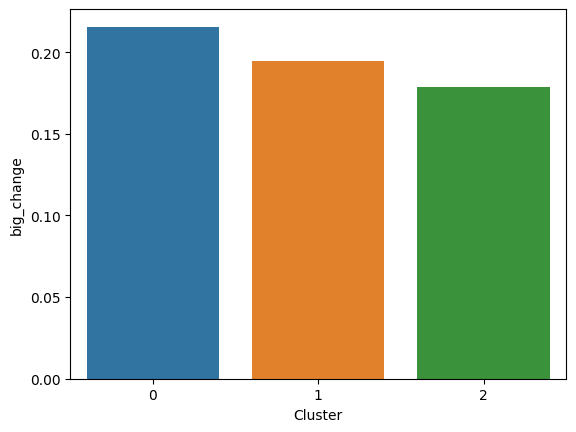

In [201]:
t = final.groupby(by=['Cluster'], as_index=False)['big_change'].mean()
sns.barplot(data=t, x='Cluster', y='big_change')

In [192]:
final.groupby(by=['team_location', 'season'], as_index=False)['big_change'].mean().sort_values(by='big_change', ascending=False)

,team_location,season,big_change
409,Detroit Mercy,2022,0.714286
476,Evansville,2018,0.666667
343,Columbia,2019,0.625000
1315,Pacific,2020,0.625000
451,Eastern Illinois,2022,0.600000
...,...,...,...
1695,Tennessee,2018,0.000000
1692,Temple,2021,0.000000
858,Long Island University,2018,0.000000
642,High Point,2017,0.000000


In [203]:
final[(final['team_location']=='Detroit Mercy') & (final['season']==2022)][['athlete_display_name', 'minutes', 'Model_Minutes', 'WINS_ADDED']]

,athlete_display_name,minutes,Model_Minutes,WINS_ADDED
7,Willy Isiani,23.827586,36.965517,26.568787
3,Prince Oduro,21.125000,36.965517,25.667925
8,Kyle LeGreair,13.272727,35.965517,23.050501
6,Antoine Davis,36.965517,29.000000,21.786699
11,Bryon Ottrix,12.000000,29.000000,21.725998
5,Madut Akec,29.416667,19.000000,19.929059
0,D.J. Harvey,26.076923,7.103448,18.300508
2,Kevin McAdoo,25.666667,1.000000,18.163756
9,Matt Johnson,25.551724,1.000000,18.125442
10,Noah Waterman,25.285714,1.000000,18.036772


In [202]:
final[(final['team_location']=='Evansville') & (final['season']==2018)]

,team_location,season,team_id,athlete_id,athlete_display_name,win,games,team_score,assists,blocks,...,PPA,minutes,def_efficiency,possesions,points,Cluster,WINS_ADDED,Model_Minutes,abs_change,big_change
3,Evansville,2018,339,4066992.0,Solomon Hainna,17,32,65.4375,0.047619,0.000000,...,0.020833,14.000000,0.829420,3.153333,0.285714,1,22.796778,35.741935,21.741935,1
4,Evansville,2018,339,4066993.0,Dru Smith,17,32,65.4375,0.151880,0.015038,...,0.919854,30.227273,3.901420,12.140909,0.454135,1,22.540004,35.741935,5.514663,0
1,Evansville,2018,339,67745.0,Blake Simmons,17,32,65.4375,0.058664,0.008123,...,1.018091,35.741935,6.431694,10.643226,0.291516,1,22.508817,34.741935,1.000000,0
2,Evansville,2018,339,3137001.0,Ryan Taylor,17,32,65.4375,0.031854,0.006826,...,0.775018,35.160000,2.348696,21.494400,0.606371,1,22.320342,29.000000,6.160000,0
9,Evansville,2018,339,4279132.0,Dainius Chatkevicius,17,32,65.4375,0.008237,0.064250,...,1.057206,18.968750,16.064602,3.831250,0.253707,1,20.446599,29.000000,10.031250,1
11,Evansville,2018,339,4279134.0,K.J. Riley,17,32,65.4375,0.118644,0.006519,...,0.779737,23.968750,10.731799,7.296250,0.281617,1,18.592842,19.000000,4.968750,0
0,Evansville,2018,339,67743.0,Duane Gibson,17,32,65.4375,0.118834,0.015695,...,0.480864,22.300000,5.695416,8.532000,0.291480,1,18.036592,11.774194,10.525806,1
10,Evansville,2018,339,4279133.0,Noah Frederking,17,32,65.4375,0.052174,0.004348,...,0.901457,21.562500,15.576966,5.763438,0.250725,1,17.790759,1.000000,20.562500,1
7,Evansville,2018,339,4279130.0,Marty Hill,17,32,65.4375,0.070866,0.000000,...,0.228497,14.111111,4.501781,3.915556,0.259843,1,15.306963,1.000000,13.111111,1
6,Evansville,2018,339,4066996.0,John Hall,17,32,65.4375,0.031891,0.015945,...,0.582887,13.718750,16.847333,3.380937,0.207289,1,15.176176,1.000000,12.718750,1
